<a href="https://colab.research.google.com/github/Naseem-tahir123/AI-ML/blob/main/EDA_of_Weather_Classification_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('weather_classification_data.csv')

# Exploring the Dataset


In [ ]:
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
dataset.shape

(13200, 11)

In [ ]:
def dataset_info(dataset):
  print("\n\033[1m Shape of Data Set:\033[0m ", dataset.shape)
  print("\n\033[1m Columns in Data Set:\033[0m ", dataset.columns.tolist())
  print("\n\033[1m Data types Of Columns:\n\033[0m ", dataset.dtypes)
  print("\n\033[1m Information About Data Set:\n\033[0m ")
  dataset.info()
  print("\n\033[1m Number of Unique Values In Each Column:\n\033[0m ")
  for i in dataset.columns:
    print(f"\033[1m {i}:\033[0m ", dataset[i].nunique())
  print("\n\033[1m Number of Null Values In Each Columns:\n\033[0m ", dataset.isnull().sum())
  print("\n\033[1m Number of Duplicate Rows:\033[0m ", dataset.duplicated().sum())
  print("\n\033[1m Descriptive Statistics Of Data Set:\n\033[0m ", dataset.describe().transpose())

dataset_info(dataset)


 Shape of Data Set:  (13200, 11)

 Columns in Data Set:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']

 Data types Of Columns:
  Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

 Information About Data Set:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 

# Data Visualization

In [ ]:
dataset['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

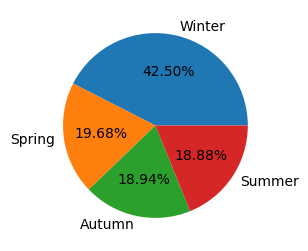

In [ ]:
a= dataset['Season'].value_counts().index
b = dataset['Season'].value_counts().values
plt.figure(figsize=(5,3))
plt.pie(b, labels= a, autopct='%0.2f%%')
plt.show()

In [ ]:
x = dataset['Weather Type'].value_counts().index
y = dataset['Weather Type'].value_counts().values


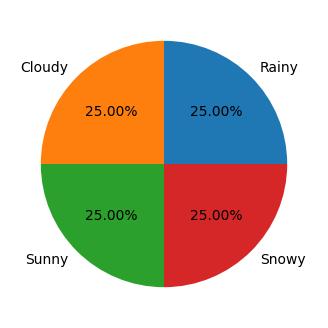

In [ ]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.show()

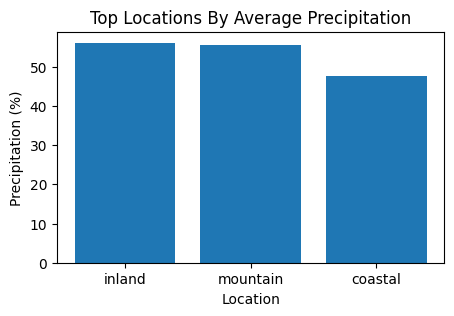

In [ ]:
top_locations = dataset.groupby('Location')['Precipitation (%)'].mean().nlargest()
plt.figure(figsize=(5, 3))
plt.bar(top_locations.index,top_locations.values)
plt.title('Top Locations By Average Precipitation')
plt.xlabel('Location')
plt.ylabel('Precipitation (%)')

plt.show()

# Precipitation by % Location
**bold text**

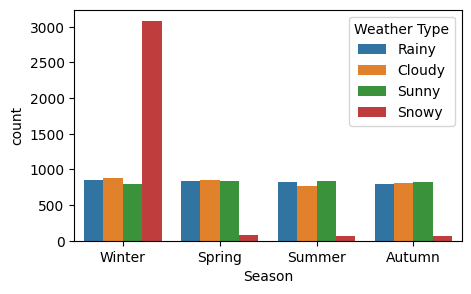

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Season', data = dataset, hue='Weather Type')
plt.show()

In [ ]:
dataset["Cloud Cover"].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

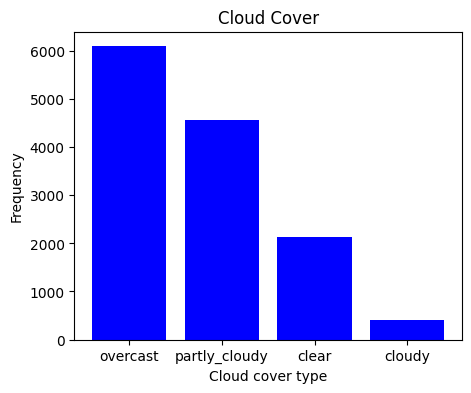

In [ ]:
cloud_cover = ['overcast', 'partly_cloudy', 'clear', 'cloudy']
cloud_cover_value = [6090 , 4560, 2139, 411]
plt.figure(figsize=(5,4))
plt.bar(cloud_cover,cloud_cover_value, color="blue")
plt.title("Cloud Cover")
plt.xlabel("Cloud cover type")
plt.ylabel("Count")
plt.show()


In [ ]:
dataset["Location"].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

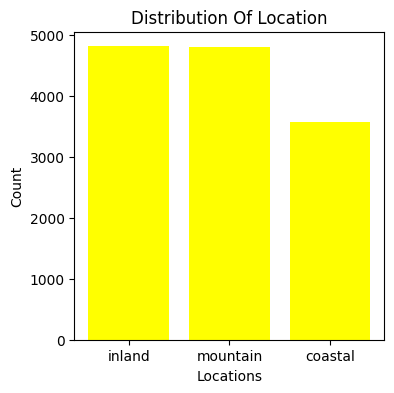

In [ ]:
Location = ['inland','mountain','coastal']
location_values = [4816, 4813, 3571]
plt.figure(figsize=(4,4))
plt.bar(Location, location_values, color='yellow')
plt.title('Distribution Of Location')
plt.xlabel('Locations')
plt.ylabel('Count')
plt.show()


In [ ]:
dataset["Season"].value_counts()
dataset["Weather Type"].value_counts()



Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Text(0, 0.5, 'Density')

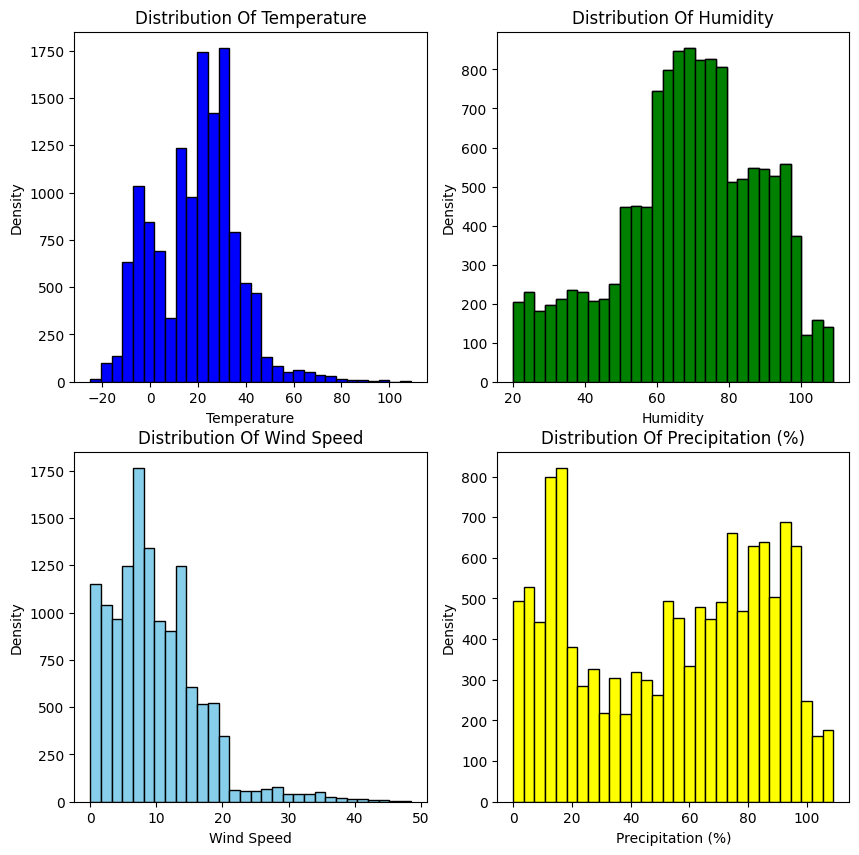

In [ ]:
# plt.hist(dataset['Temperature'], bins=30, color='blue', edgecolor='black')
# plt.title('Distribution of Temperature')
# plt.xlabel('Temperature')
# plt.ylabel('Density')
# plt.show()
fig, ax = plt.subplots(nrows = 2 , ncols = 2, figsize = (10,10))
ax[0,0].hist(dataset['Temperature'], bins=30, color='blue', edgecolor='black')
ax[0,0].set_title("Distribution Of Temperature")
ax[0,0].set_xlabel("Temperature")
ax[0,0].set_ylabel("Density")

ax[0,1].hist(dataset['Humidity'], bins=30, color='green', edgecolor='black')
ax[0,1].set_title("Distribution Of Humidity")
ax[0,1].set_xlabel("Humidity")
ax[0,1].set_ylabel("Density")

ax[1,0].hist(dataset['Wind Speed'], bins=30, color='skyblue', edgecolor='black')
ax[1,0].set_title("Distribution Of Wind Speed")
ax[1,0].set_xlabel("Wind Speed")
ax[1,0].set_ylabel("Density")

ax[0,1].hist(dataset['Humidity'], bins=30, color='green', edgecolor='black')
ax[0,1].set_title("Distribution Of Humidity")
ax[0,1].set_xlabel("Humidity")
ax[0,1].set_ylabel("Density")

ax[1,1].hist(dataset['Precipitation (%)'], bins=30, color='yellow', edgecolor='black')
ax[1,1].set_title("Distribution Of Precipitation (%)")
ax[1,1].set_xlabel("Precipitation (%)")
ax[1,1].set_ylabel("Density")

In [ ]:
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
